In [136]:
import random
import numpy as np
import pandas as pd
from deap import base
from deap import creator
from deap import tools,algorithms

In [137]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

In [138]:
toolbox = base.Toolbox()
toolbox.register("attr_float", random.random)
toolbox.register("individual", tools.initRepeat, creator.Individual,toolbox.attr_float, n=IND_SIZE)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

In [139]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
# Imports
import numpy as np 

from sklearn import metrics
dataset=pd.read_csv("circles500.csv")
X=pd.DataFrame(dataset)
Y=X["Class"]
del X["Class"]
X=X.values
y=Y.values

# Define useful functions    

# Activation function
def sigmoid(t):
    return 1/(1+np.exp(-t))

def chunks(lst, n):
    return [lst[i:i + n] for i in range(0, len(lst), n)]

def network_config(ind):
    weight_hidden=(np.asarray(chunks(ind[:10],5)))
    weight_output=(np.asarray(chunks(ind[10:15],1)))
    bias_hidden=np.asarray(ind[15:20])
    bias_weight=np.asarray(ind[20])
    network_config={
        "W1":weight_hidden,
        "W2":weight_output,
        "b1":bias_hidden,
        "b2":bias_weight
    }
    return network_config

# Class definition
class NeuralNetwork:
    def __init__(self, x,y,network_config):
        self.input = x
        self.weights1= network_config["W1"] # considering we have 4 nodes in the hidden layer
        self.weights2 = network_config["W2"]
        self.bias1=network_config["b1"]
        self.bias2=network_config["b2"]
        self.y = y
        self.output = np. zeros(y.shape)
        
    def feedforward(self):
        self.layer1 = sigmoid(np.dot(self.input, self.weights1))
        self.layer2 = sigmoid(np.dot(self.layer1, self.weights2))
        return self.layer2

    def train(self, X, y):
        self.output = self.feedforward()
        
    def predict(self):
        Ypred=[]
        Yhat=self.feedforward()
        for y in Yhat:
            if y<0.5:
                Ypred.append([0])
            else:Ypred.append([1])
        return np.asarray(Ypred)

In [140]:
def evalOneMax(individual):
    config=network_config(individual)    
    NN = NeuralNetwork(X,y,config)
    pred=NN.predict()
    from sklearn import metrics
    return (metrics.accuracy_score(y,np.asarray(pred).flatten()),)

In [141]:
toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

In [142]:
import numpy
def main():
    pop = toolbox.population(n=500)
    #print(pop)
    fitnesses = list(map(toolbox.evaluate, pop))
    print(fitnesses)
    print(len(fitnesses))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    CXPB, MUTPB = 0.5, 0.4
    lambda_,mu=100,50
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    pop_simple, logbook_simple = algorithms.eaSimple(pop, toolbox, cxpb=CXPB, mutpb=MUTPB, ngen=100,stats=stats,verbose=False)
    pop, logbook = algorithms.eaMuCommaLambda(pop, toolbox, mu, lambda_, cxpb=CXPB, mutpb=MUTPB, ngen=100,stats=stats,verbose=False)
    return(pop_simple, logbook_simple,pop, logbook)

[(0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,), (0.5,),

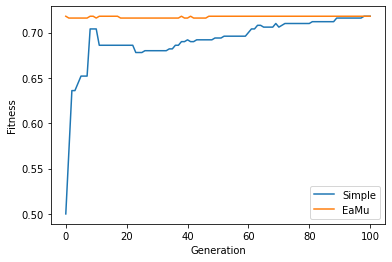

In [143]:
if __name__ == "__main__":
    pop_simple, logbook_simple,pop, logbook=main()
    #print(pop)
    import matplotlib.pyplot as plt
    gen, avg, min_, max_eamu = logbook.select("gen", "avg", "min", "max")
    gen, avg, min_, max_simple = logbook_simple.select("gen", "avg", "min", "max")
    plt.plot(gen, max_simple, label="Simple")
    plt.plot(gen, max_eamu, label="EaMu")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend()
    plt.show()
